Import packages

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Set inline

In [4]:
%matplotlib inline

Import CSV to dataframe

In [7]:
filename = 'export_dummy.csv'
df = pd.read_csv(filename, index_col=0)

In [13]:
df.head()

,id_str,created_at,text,entities.hashtags,lang,user.screen_name,user.id_str,user.followers_count,user.friends_count,retweeted_status.id_str,...,retweeted_status.entities.hashtags,retweeted_status.lang,retweeted_status.user.screen_name,retweeted_status.user.id_str,retweeted_status.user.followers_count,retweeted_status.user.friends_count,sentiment,sentiment_ori,bot_status,bot_ori_status
0,911048657474113536,Fri Sep 22 02:05:01 +0000 2017,EuropeUnion : Click HERE▶️https://t.co/iwDoMV6...,"['EU', 'News', 'EuropeUnion']",fr,nathymora,308046422,611,404,NaN,...,NO HASHTAGS,NaN,NaN,NaN,NaN,NaN,0.823204,0.889909,0.032754,0.025925
1,911048676205826048,Fri Sep 22 02:05:05 +0000 2017,Click HERE▶️https://t.co/Y3loSofx8E\n#EU #News...,"['EU', 'News', 'EuropeUnion']",en,EuropeUnion,194119186,9489,586,NaN,...,NO HASHTAGS,NaN,NaN,NaN,NaN,NaN,0.601482,-0.054060,0.360294,0.887084
2,911048690529431552,Fri Sep 22 02:05:08 +0000 2017,EuropeUnion : Click HERE▶️https://t.co/hWrKk2Z...,"['EU', 'News', 'EuropeUnion']",en,nathymora,308046422,611,404,NaN,...,NO HASHTAGS,NaN,NaN,NaN,NaN,NaN,-0.166085,-0.275917,0.048649,0.413533
3,911048692567760896,Fri Sep 22 02:05:09 +0000 2017,RT @tsemtulku: Three art styles to see! https:...,"['buddhism', 'buddhist', 'europe', 'canada', '...",en,KumarTa69783205,882043107776184320,18,56,9.099393e+17,...,"['buddhism', 'buddhist', 'europe', 'canada', '...",en,tsemtulku,23065876.0,452447.0,169.0,0.460622,0.206314,0.199692,0.920356
4,911048712570462210,Fri Sep 22 02:05:14 +0000 2017,Thread. #Brexit https://t.co/oG4MqhTJMt,['Brexit'],en,SergioTavaresUK,2178018878,203,418,NaN,...,NO HASHTAGS,NaN,NaN,NaN,NaN,NaN,-0.489391,0.806878,0.019213,0.263571


In [31]:
df[['entities.hashtags', 'bot_status', 'bot_ori_status']].head()

,entities.hashtags,bot_status,bot_ori_status
0,"['EU', 'News', 'EuropeUnion']",0.032754,0.025925
1,"['EU', 'News', 'EuropeUnion']",0.360294,0.887084
2,"['EU', 'News', 'EuropeUnion']",0.048649,0.413533
3,"['buddhism', 'buddhist', 'europe', 'canada', '...",0.199692,0.920356
4,['Brexit'],0.019213,0.263571


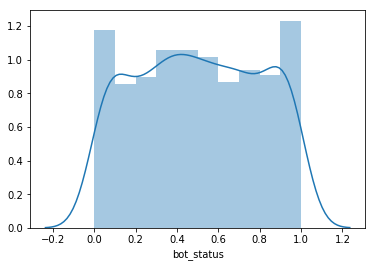

In [32]:
sns.distplot(df['bot_status'])

Set 0.6 as the threshold of robot or human. Above 0.6 is bot and below 0.6 is human.

In [44]:
bot_count = len(df[df['bot_status'] > 0.6])
bot_ori_count = len(df[df['bot_ori_status'] > 0.6])

human_count = len(df) - bot_count
human_ori_count = len(df) - bot_ori_count

This is pie chart showing the comparison between bot and human who tweet and discuss about brexit

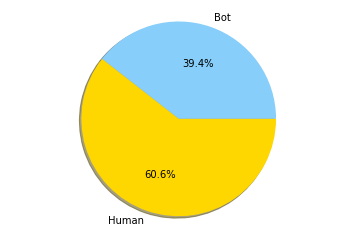

In [55]:
bot_vs_human_labels = ['Bot', 'Human']
bot_vs_human_data = [bot_count, human_count]
colors = ['lightskyblue', 'gold']

plt.pie(bot_vs_human_data, 
        labels = bot_vs_human_labels,
        colors = colors,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 0)
plt.axis('equal')
plt.show()

This is pie chart showing comparison between bot and human who got retweeted in brexit discussion

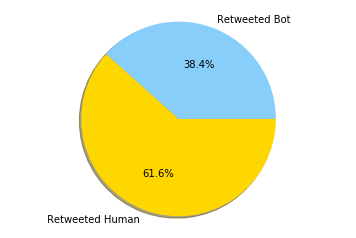

In [56]:
bot_vs_human_labels = ['Retweeted Bot', ' Retweeted Human']
bot_vs_human_data = [bot_ori_count, human_ori_count]
colors = ['lightskyblue', 'gold']

plt.pie(bot_vs_human_data, 
        labels = bot_vs_human_labels,
        colors = colors,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 0)
plt.axis('equal')
plt.show()